<a href="https://colab.research.google.com/github/sbeldine97/SO-Individual_colab/blob/main/Loan_Credibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PREDICTING LOAN CREDIBILITY AMONG BORROWERS USING MACHINE LEARNING ALGORITHMS**

 by Sandra Beldine Otieno - 150962

**Objectives**
1. To perform exploratory data analysis on the dataset.

2. To identify the relevant features that determine loan credibility among
borrowers.
3.  To come up with a machine learning model that predicts whether borrowers are eligible for loans or not.




Contextually, loan credibility refers to a borrower's capacity to repay a loan on schedule and according to the terms agreed upon. The credit score and credit history of a borrower are important markers of loan reliability. Investors who are thinking about lending money to a borrower want to make sure the borrower is likely to repay the loan, therefore they will normally look at the borrower's credit score, credit history, and other financial information to establish the level of risk associated in the loan.

*   Loan credibility monitoring is vital for investors because it allows them to estimate the risk of lending money to a borrower and make informed investment decisions.
*   Investors can spot potential red flags and assess the possibility of default by monitoring loan credibility. This enables them to avoid investing in loans that are likely to default in favor of loans that are more likely to deliver a strong return on investment. Monitoring loan credibility also enables investors to make more informed judgments about loan terms and conditions, such as interest rate and repayment schedule, which can lower the chance of default.



The data used was obtained from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.

Here is what the columns represent:

1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
3. int_rate: The interest rate of the loan, as a proportion (a rate of 11% was stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4. installment: The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc: The natural log of the self-reported annual income of the borrower.
6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico: The FICO credit score of the borrower.
days.with.cr.line: The number of days the borrower has had a credit line.
8. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
9. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
10. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
11. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
12. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [ ]:
#Including the libraries that would be used
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import pandas_profiling
import pydotplus
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn import cluster, decomposition, pipeline, preprocessing
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
import statsmodels


In [ ]:
# Uploading datset from my github to this colab notebook
df = pd.read_csv('https://raw.githubusercontent.com/sbeldine97/SO-Individual_colab/main/loandata.csv')

**Performing Exploratory Data Analysis.**


*   This is to ensure that I understand the dataset fully
*   Perform any data preprocessing issues like missing values and outliers.
*   Data Visualization







In [ ]:
#Describing the dataset which gives statistical measures of the data
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.columns
#The data has 14 columns as shown below.

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [ ]:
df.dtypes
#The data is made up of three types of data; object, float and integers.

credit_policy          int64
purpose               object
int_rate             float64
installment          float64
log_annual_inc       float64
dti                  float64
fico                   int64
days_with_cr_line    float64
revol_bal              int64
revol_util           float64
inq_last_6mths         int64
delinq_2yrs            int64
pub_rec                int64
not_fully_paid         int64
dtype: object

In [ ]:
df.shape
#This shows the number of columns and rows of the data i.e., it has 9578 rows and 14 columns

(9578, 14)

In [ ]:
df.head()
#This shows the first five rows of the dataset

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.tail()
#This shows the last five entries of the dataset

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [ ]:
#checking for missing values
df.isnull().any()

credit_policy        False
purpose              False
int_rate             False
installment          False
log_annual_inc       False
dti                  False
fico                 False
days_with_cr_line    False
revol_bal            False
revol_util           False
inq_last_6mths       False
delinq_2yrs          False
pub_rec              False
not_fully_paid       False
dtype: bool

In [ ]:
# Now that there were no missing values, proceeded to visualize the data.

In [ ]:
##Percentages of purposes of loans
df.purpose.value_counts()/9578 *100

debt_consolidation    41.313427
all_other             24.337022
credit_card           13.176028
home_improvement       6.567133
small_business         6.462727
major_purchase         4.562539
educational            3.581123
Name: purpose, dtype: float64

Majority of the loans taken are for debt consolidation (41.3%) while the least that are taken are for educational purposes (3.6%). This literally speaks volumes on personal financial circumstances, life events, and individual needs and goals

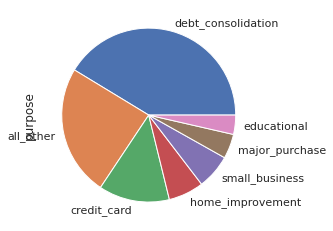

In [ ]:
df.purpose.value_counts().plot.pie()

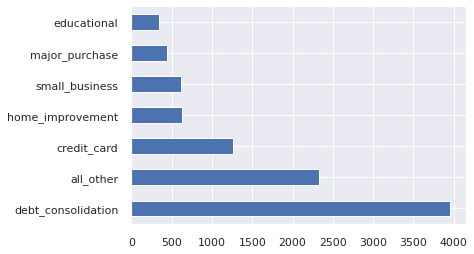

In [ ]:
df.purpose.value_counts().plot.barh()

In [ ]:
#Transforming categorical data into numerical values
df = pd.get_dummies(df, columns = ["purpose"])
df.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
#Numerical
df.installment.mean()

319.08941323867197

In [ ]:
df.installment.max()

940.14

In [ ]:
df.installment.min()

15.67

In [ ]:
df.log_annual_inc.mean()

10.93211713780027

In [ ]:
df.log_annual_inc.max()

14.52835448

In [ ]:
df.log_annual_inc.min()

7.547501683

In [ ]:
# Relationships - Numeric to Numeric
df.installment.corr(df.log_annual_inc)

0.4481021536896276

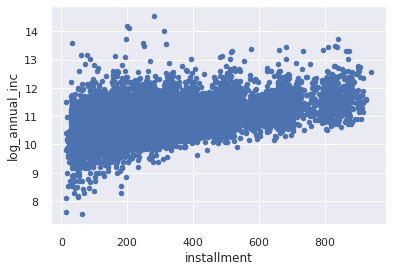

In [ ]:
df.plot.scatter(x='installment', y='log_annual_inc')

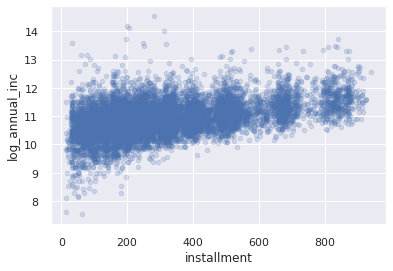

In [ ]:
df.plot.scatter(x='installment', y='log_annual_inc', alpha =.2)

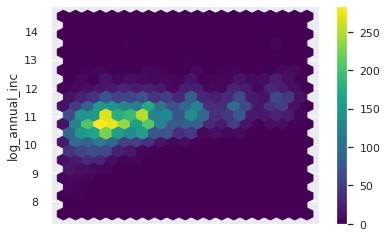

In [ ]:
# Density
df.plot.hexbin(x='installment', y='log_annual_inc', gridsize=20, cmap='viridis')

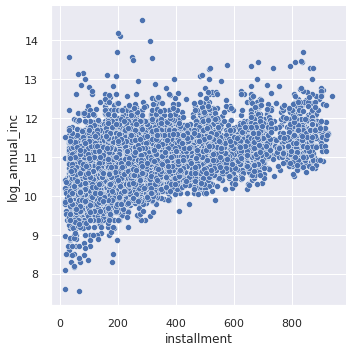

In [ ]:
sns.relplot(x='installment', y='log_annual_inc', data=df)

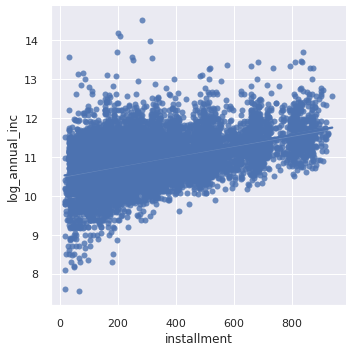

In [ ]:
sns.lmplot(x='installment', y='log_annual_inc', data=df)

In [ ]:
#Numerical Data - Part two
df.fico.mean()

710.8463144706619

In [ ]:
df.fico.min()

612

In [ ]:
df.fico.max()

827

In [ ]:
df.int_rate.mean()

0.12264006055543955

In [ ]:
df.int_rate.min()

0.06

In [ ]:
df.int_rate.max()

0.2164

In [ ]:
df.int_rate.corr(df.fico)

-0.7148207714193592

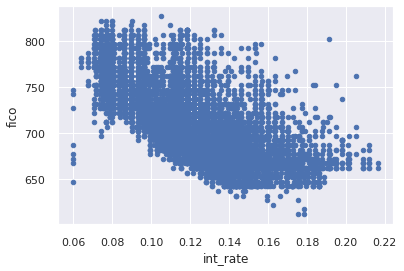

In [ ]:
df.plot.scatter(x='int_rate', y='fico')

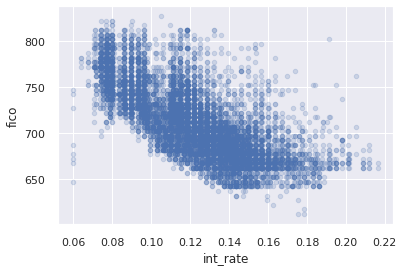

In [ ]:
df.plot.scatter(x='int_rate', y='fico', alpha =.2)

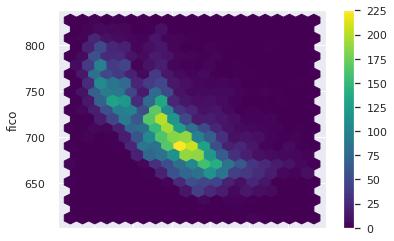

In [ ]:
# Density
df.plot.hexbin(x='int_rate', y='fico', gridsize=20, cmap='viridis')

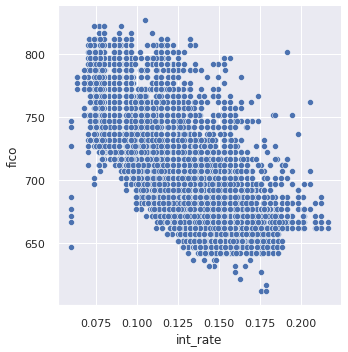

In [ ]:
sns.relplot(x='int_rate', y='fico', data=df)

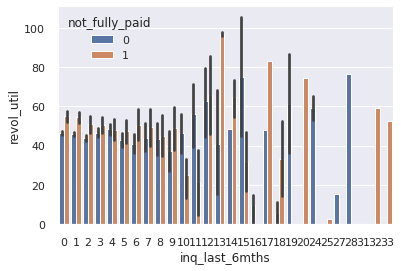

In [ ]:
sns.barplot(data=df, x="inq_last_6mths", y="revol_util",hue='not_fully_paid')

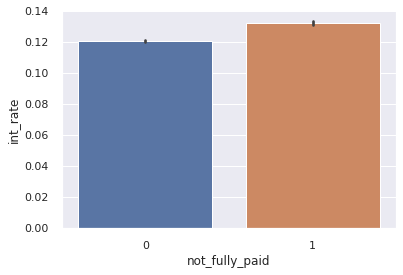

In [ ]:
sns.barplot(data=df, x="not_fully_paid", y="int_rate")

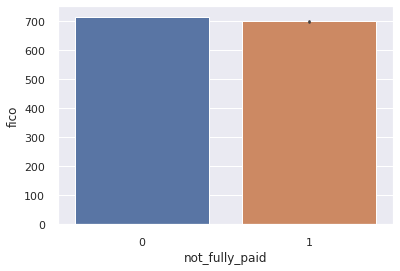

In [ ]:
sns.barplot(data=df, x="not_fully_paid", y="fico")

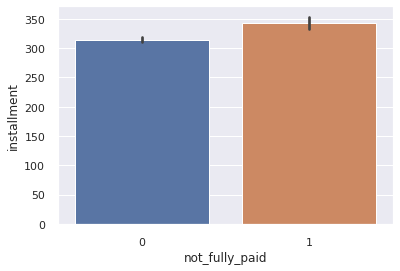

In [ ]:
sns.barplot(data=df, x="not_fully_paid", y="installment")

In [ ]:
target=df['not_fully_paid']
data=df.drop('not_fully_paid',axis=1)

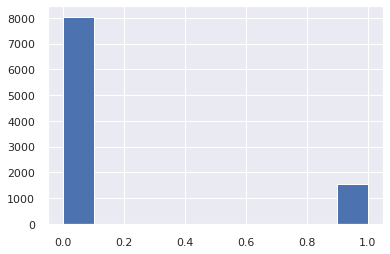

In [ ]:
target.hist()

In [ ]:
df1=df.copy()

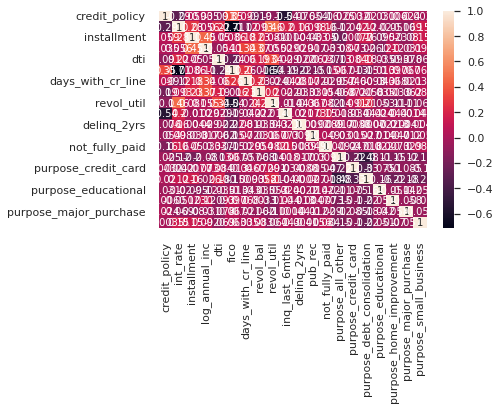

In [ ]:
#Feature selection using correlation
ax = sns.heatmap(df.corr(), annot=True)
sns.set(rc={'figure.figsize':(20,15)})

In [ ]:
#Correlation between the features was very small hence none of the features was dropped

# Splitting the  data into training and test data set

In [ ]:
X = df1.drop("not_fully_paid", axis = 1)
y = df1["not_fully_paid"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.3, random_state = 4)

Scalling


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape , X_test.shape)


(6704, 19) (2874, 19)


Model selection

In [ ]:
X_train

array([[ 0.4946802 , -0.02460392,  0.07098449, ..., -0.26696212,
        -0.21148274, -0.26081819],
       [ 0.4946802 ,  0.44353501, -1.13159895, ..., -0.26696212,
        -0.21148274, -0.26081819],
       [ 0.4946802 ,  0.22061171,  0.08643202, ...,  3.74584972,
        -0.21148274, -0.26081819],
       ...,
       [ 0.4946802 ,  0.59215055,  0.77053028, ..., -0.26696212,
        -0.21148274, -0.26081819],
       [-2.02150802, -1.0500511 ,  0.00779002, ..., -0.26696212,
        -0.21148274, -0.26081819],
       [ 0.4946802 , -1.82285188, -1.39193109, ..., -0.26696212,
        -0.21148274, -0.26081819]])

#Model training and testing

In [ ]:
#Importing the relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

1. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.848990953375087


In [ ]:
#The logistic regression model accuracy is 84.9%

2. Decision Tree Classifier

In [ ]:
Decision_tree = DecisionTreeClassifier()
Decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
Decision_tree_pred = Decision_tree.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, Decision_tree_pred))

Accuracy: 0.7456506610995128


In [ ]:
#The acuracy of the decision tree classifier is 73.8%

3. Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, rfc_pred))

Accuracy: 0.8500347947112039


In [ ]:
#The accuracy of Random Forest is 91% which is better than both logistic regression and decision tree classifier

4. Gboost

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
gb_clf.score(X_test, y_test)

0.8430758524704245

In [ ]:
gb_pred = gb_clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, gb_pred))

Accuracy: 0.8430758524704245


In [ ]:
#The accuracy of the gradient boosting classifier is 84% which is better than the decision tree

5. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [ ]:
svc_pred = svc_clf.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, svc_pred))

Accuracy: 0.8496868475991649


In [ ]:
#The support vector machine model is better than the gradient boosting classifier and the decision tree. Though it should be noted that the accuracy is almost similar to the logistic regresssion and random forest

LGBM Classifier

In [ ]:
import lightgbm as lgb

lg_clf = lgb.LGBMClassifier()
lg_clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
lg_pred = lg_clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, lg_pred))

Accuracy: 0.8441196938065414


##Building a Machine Learning Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(units = 128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 64, activation = 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
es = EarlyStopping(monitor = "accuracy", patience = 4)

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.01),
 loss = 'binary_crossentropy',
 metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               2560      
                                                                 
 batch_normalization_12 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_13 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 64)               

Model Fitting

In [ ]:
result = model.fit(X_train, y_train,
 validation_data = (X_test, y_test),
 callbacks = [es],
 epochs = 100)

Epoch 1/100
210/210 [==============================] - 5s 10ms/step - loss: 0.4618 - accuracy: 0.8132 - val_loss: 0.4027 - val_accuracy: 0.8497
Epoch 2/100
210/210 [==============================] - 2s 7ms/step - loss: 0.4259 - accuracy: 0.8353 - val_loss: 0.4046 - val_accuracy: 0.8497
Epoch 3/100
210/210 [==============================] - 1s 6ms/step - loss: 0.4243 - accuracy: 0.8358 - val_loss: 0.3978 - val_accuracy: 0.8497
Epoch 4/100
210/210 [==============================] - 1s 6ms/step - loss: 0.4209 - accuracy: 0.8355 - val_loss: 0.3982 - val_accuracy: 0.8497
Epoch 5/100
210/210 [==============================] - 1s 5ms/step - loss: 0.4218 - accuracy: 0.8350 - val_loss: 0.3985 - val_accuracy: 0.8497
Epoch 6/100
210/210 [==============================] - 1s 6ms/step - loss: 0.4168 - accuracy: 0.8365 - val_loss: 0.4015 - val_accuracy: 0.8497
Epoch 7/100
210/210 [==============================] - 1s 7ms/step - loss: 0.4149 - accuracy: 0.8358 - val_loss: 0.4058 - val_accuracy: 0.850

In [ ]:
###Model testing and highlighting accuracy

In [ ]:
k_pred = model.predict(X_test)
k_pred = (k_pred > 0.5)

90/90 [==============================] - 0s 2ms/step


In [ ]:
print("Accuracy:", accuracy_score(y_test, k_pred))


Accuracy: 0.8496868475991649


In [ ]:
##the accuracy of the built ML model is 85%

#Model Cross-Validation

Using GridSearchCV to find the optimal parameter values from a given set of parameters in a grid. This was essentially used to validate the model as a cross-validation technique.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

In [ ]:
hp_clf = RandomForestClassifier()
grid_search = GridSearchCV(hp_clf, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
hp_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hp_pred))

Accuracy: 0.8469032707028532


In conclusion majority of the models tried to give a certain level of accuracy which was greater than 84% making them accurate models to determine loan credibility among borrowers.

The only model that is lowly accurate is the decision tree which in this case may not be feasible to predict loan credibility.

The main challenge with the dataset was that it was clean before I started exploring it. Making the process a little bit easier and inclined towards certain models due to some potential biasness.